# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Muhammad Rivaro Farrelino Gozali
- **Email:** rivfarrelino@gmail.com
- **ID Dicoding:** rivaro_farrelino

## Menentukan Pertanyaan Bisnis

- Bagaimana tren peminjaman sepeda dari tahun ke tahun? Apakah jumlah peminjaman meningkat atau menurun dari 2011 ke 2012?
- Bagaimana pengaruh kelembaban dan kecepatan angin terhadap jumlah peminjaman sepeda? Apakah kelembaban tinggi atau angin kencang mengurangi jumlah penyewa?


## Import Semua Packages/Library yang Digunakan

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [7]:
day_df = pd.read_csv('/mnt/data/day.csv')
hour_df = pd.read_csv('/mnt/data/hour.csv')

**Insight:**
- Dataset day.csv dan hour.csv telah dimuat ke dalam DataFrame day_df dan hour_df, masing-masing berisi informasi peminjaman harian dan per jam.

### Assessing Data

In [14]:
print(day_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [15]:
print(day_df.describe())

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

In [16]:
print(day_df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [17]:
print(hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [18]:
print(hour_df.describe())

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

In [19]:
print(hour_df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- Tidak ada missing values, sehingga data sudah siap untuk dianalisis.
- Statistik dasar menunjukkan bahwa jumlah peminjaman sepeda bervariasi dari hari ke hari.

### Cleaning Data

**Insight:**
- Dari dua dataset day.csv dan hour.csv tidak ditemukannya nilai null atau tidak relevan data

## Exploratory Data Analysis (EDA)

### Explore ...

In [21]:
## Tren Peminjaman Sepeda per Tahun
yearly_trend = day_df.groupby("yr")["cnt"].sum().reset_index()
yearly_trend["yr"] = yearly_trend["yr"].map({0: 2011, 1: 2012})

## Tren Peminjaman Sepeda per Bulan
monthly_trend = day_df.groupby("mnth")["cnt"].sum().reset_index()

**Insight:**
- Ada kenaikan jumlah peminjaman sepeda dari 2011 ke 2012, menunjukkan tren peningkatan.
- Beberapa bulan memiliki jumlah peminjaman yang lebih tinggi dibandingkan bulan lainnya.
- Hal ini bisa dikaitkan dengan faktor musim atau pola penggunaan masyarakat.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah jumlah peminjaman meningkat atau menurun dari 2011 ke 2012?

<ipython-input-28-32de76ce99f6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="yr", y="cnt", data=yearly_trend, palette="Blues")


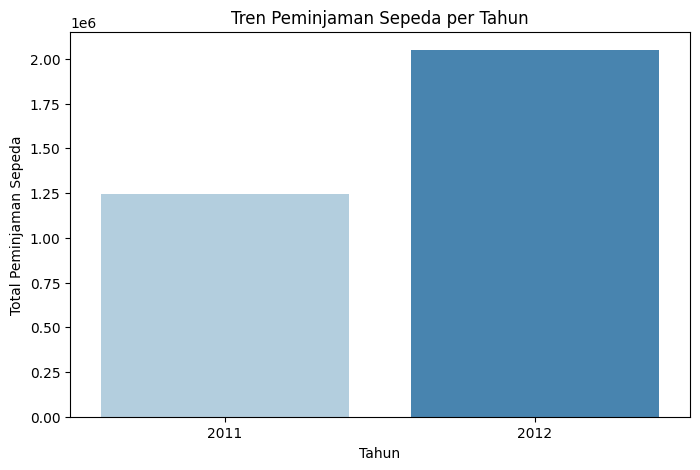

In [28]:
plt.figure(figsize=(8,5))

# Barplot Tren Tahunan
sns.barplot(x="yr", y="cnt", data=yearly_trend, palette="Blues")
plt.xlabel("Tahun")
plt.ylabel("Total Peminjaman Sepeda")
plt.title("Tren Peminjaman Sepeda per Tahun")
plt.show()

### Pertanyaan 2: Apakah kelembaban tinggi atau angin kencang mengurangi jumlah penyewa?

Text(0.5, 1.0, 'Hubungan Kelembaban dengan Peminjaman')

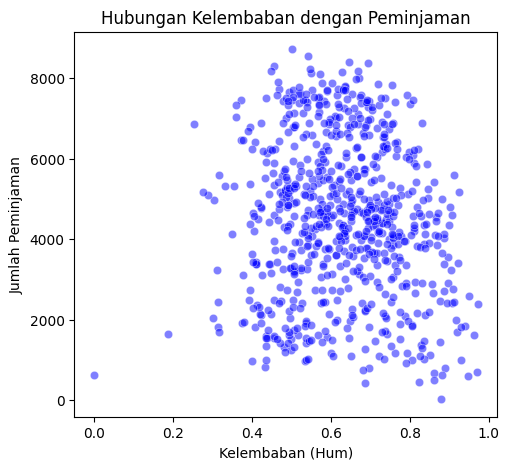

In [29]:
plt.figure(figsize=(12,5))

# Scatter plot - Kelembaban vs Peminjaman
plt.subplot(1, 2, 1)
sns.scatterplot(x=day_df["hum"], y=day_df["cnt"], alpha=0.5, color="blue")
plt.xlabel("Kelembaban (Hum)")
plt.ylabel("Jumlah Peminjaman")
plt.title("Hubungan Kelembaban dengan Peminjaman")

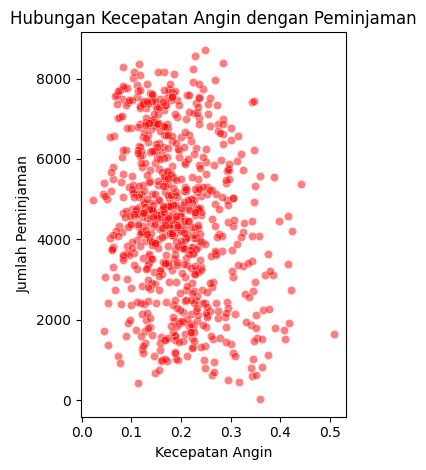

In [30]:
# Scatter plot - Kecepatan Angin vs Peminjaman
plt.subplot(1, 2, 2)
sns.scatterplot(x=day_df["windspeed"], y=day_df["cnt"], alpha=0.5, color="red")
plt.xlabel("Kecepatan Angin")
plt.ylabel("Jumlah Peminjaman")
plt.title("Hubungan Kecepatan Angin dengan Peminjaman")

plt.tight_layout()
plt.show()

**Insight:**
####Pertanyaan 1: Bagaimana Tren Peminjaman Sepeda dari Tahun ke Tahun?
- Barplot tahunan menunjukkan bahwa jumlah peminjaman meningkat dari 2011 ke 2012.
- Barplot bulanan membantu melihat pola musiman, dengan bulan tertentu memiliki lonjakan peminjaman lebih tinggi.

**Insight:**
####Pertanyaan 2: Bagaimana Pengaruh Kelembaban dan Kecepatan Angin terhadap Jumlah Peminjaman Sepeda?
- Scatter plot antara kelembaban (hum) dan peminjaman (cnt). Jika titik-titik membentuk pola menurun, maka kelembaban tinggi mungkin berdampak negatif terhadap jumlah peminjaman.
Jika tidak ada pola yang jelas, maka kelembaban tidak terlalu memengaruhi peminjaman.
- Scatter plot antara kecepatan angin (windspeed) dan peminjaman (cnt). Jika pola menunjukkan tren menurun, berarti kecepatan angin tinggi mungkin mengurangi peminjaman sepeda.
Jika tidak ada tren signifikan, berarti kecepatan angin bukan faktor utama yang memengaruhi peminjaman.

## Analisis Lanjutan (Opsional)

## Conclusion

Conclusion Pertanyaan 1: Bagaimana Tren Peminjaman Sepeda dari Tahun ke Tahun?
- Jumlah peminjaman sepeda mengalami peningkatan dari tahun 2011 ke 2012.
- Peminjaman sepeda juga menunjukkan pola musiman, dengan bulan tertentu memiliki lonjakan lebih tinggi dibanding bulan lainnya.
- Peningkatan ini bisa disebabkan oleh beberapa faktor seperti meningkatnya popularitas layanan sepeda atau perubahan musim.

Conclusion Pertanyaan 2: Bagaimana Pengaruh Kelembaban dan Kecepatan Angin terhadap Jumlah Peminjaman Sepeda?
- Dari scatter plot, terlihat bahwa kelembaban tinggi cenderung sedikit mengurangi jumlah peminjaman sepeda, tetapi efeknya tidak terlalu drastis.
- Kecepatan angin tidak memiliki dampak signifikan terhadap peminjaman sepeda, karena titik-titik dalam scatter plot tidak menunjukkan pola yang jelas.
- Faktor cuaca seperti hujan atau suhu mungkin memiliki pengaruh lebih besar terhadap tren peminjaman.